In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import models, layers

2024-08-25 16:54:43.652387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 16:54:43.652547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 16:54:43.808407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    shear_range=0.1,
    rotation_range=20, 
    width_shift_range = 0.2,
    height_shift_range = 0.2,

)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
IMAGE_SIZE = (224, 224)
train = train_datagen.flow_from_directory("/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train", target_size=IMAGE_SIZE, class_mode='categorical',
                                         batch_size=32, color_mode='rgb')
test = test_datagen.flow_from_directory("/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test", target_size=IMAGE_SIZE, class_mode='categorical',
                                       batch_size=32)
validation = validation_datagen.flow_from_directory("/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/valid", target_size=IMAGE_SIZE, class_mode='categorical',
                               batch_size=32)

Found 2756 images belonging to 3 classes.
Found 134 images belonging to 3 classes.
Found 262 images belonging to 3 classes.


(32, 224, 224, 3)


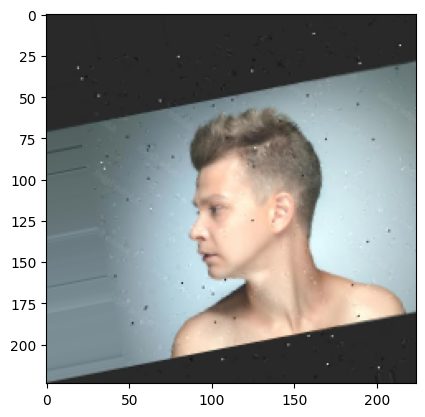

(32, 224, 224, 3)


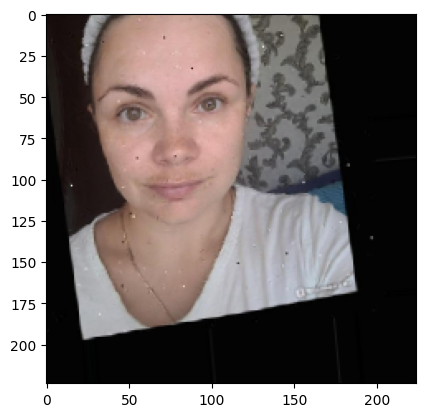

In [3]:
for _ in range(2):
    img, label = next(train)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

In [4]:
import numpy as np
image_paths = np.array(train.filenames)
import pandas as pd
image_paths_df = pd.DataFrame(image_paths)
image_paths_df['type'] = image_paths_df[0].apply(lambda x: x.strip()[0])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type', ylabel='Count'>

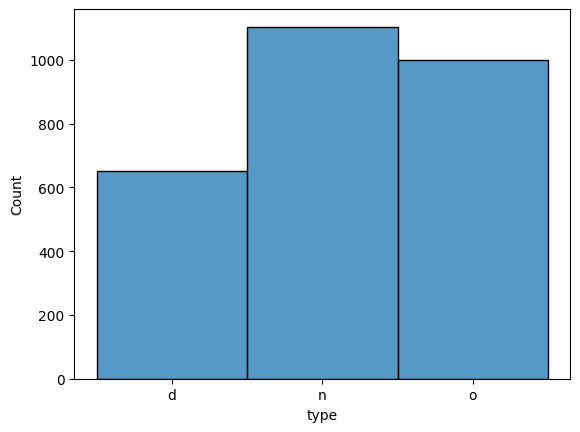

In [5]:
sns.histplot(image_paths_df['type'])

Where 
1. d: Dry Skin
2. n: Normal Skin
3. o: Oily Skin

In [6]:
from tensorflow.keras.applications import MobileNetV2

weights_path = '/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
pre_trained_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=weights_path,
    pooling='avg'
)
pre_trained_model.trainable = True
set_trainable = False
for layer in pre_trained_model.layers:
    if layer.name == 'block_16_expand':
        set_trainable = True
    if set_trainable:
        layer.trainbale = True
    else:
        layer.trainable=False


In [7]:
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.4065 - loss: 1.1351 - val_accuracy: 0.3321 - val_loss: 2.8981
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.5829 - loss: 0.9060 - val_accuracy: 0.4046 - val_loss: 3.2268
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6523 - loss: 0.7974 - val_accuracy: 0.3893 - val_loss: 3.3546
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7309 - loss: 0.6198 - val_accuracy: 0.4084 - val_loss: 2.9775
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7979 - loss: 0.5170 - val_accuracy: 0.3473 - val_loss: 3.0230
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8222 - loss: 0.4576 - val_accuracy: 0.4122 - val_loss: 5.7441
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8650 - loss: 0.3669 - val_accuracy: 0.3931 - val_loss: 5.3246
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8779 - loss: 0.3300 - val_accuracy: 0.4046 - val_loss: 6.6494
E

<Axes: >

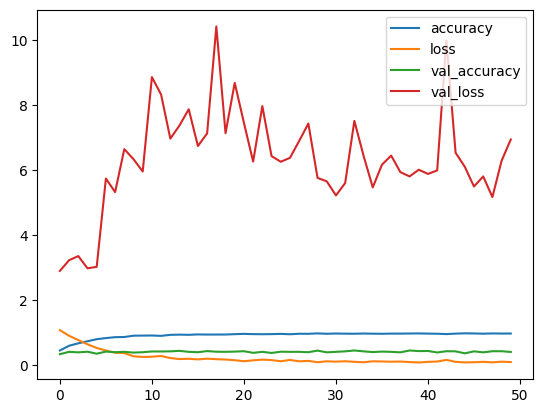

In [8]:
a = pd.DataFrame(model.history.history)
a.plot()

In [9]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

/tmp/ipykernel_34/2377123303.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


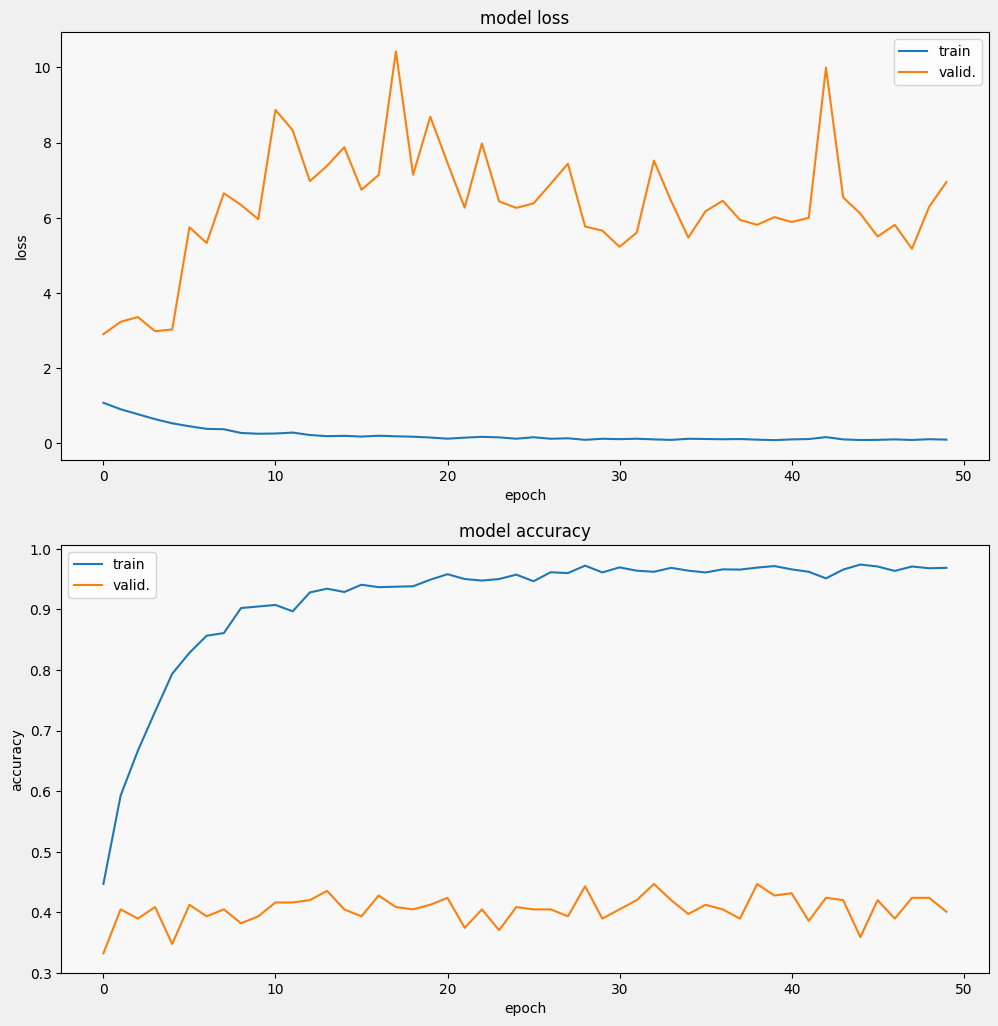

In [10]:
#display
display_training_curves(
    model.history.history['loss'],
    model.history.history['val_loss'],
    'loss', 211)
display_training_curves(
    model.history.history['accuracy'],
    model.history.history['val_accuracy'],
    'accuracy', 212)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 684ms/step


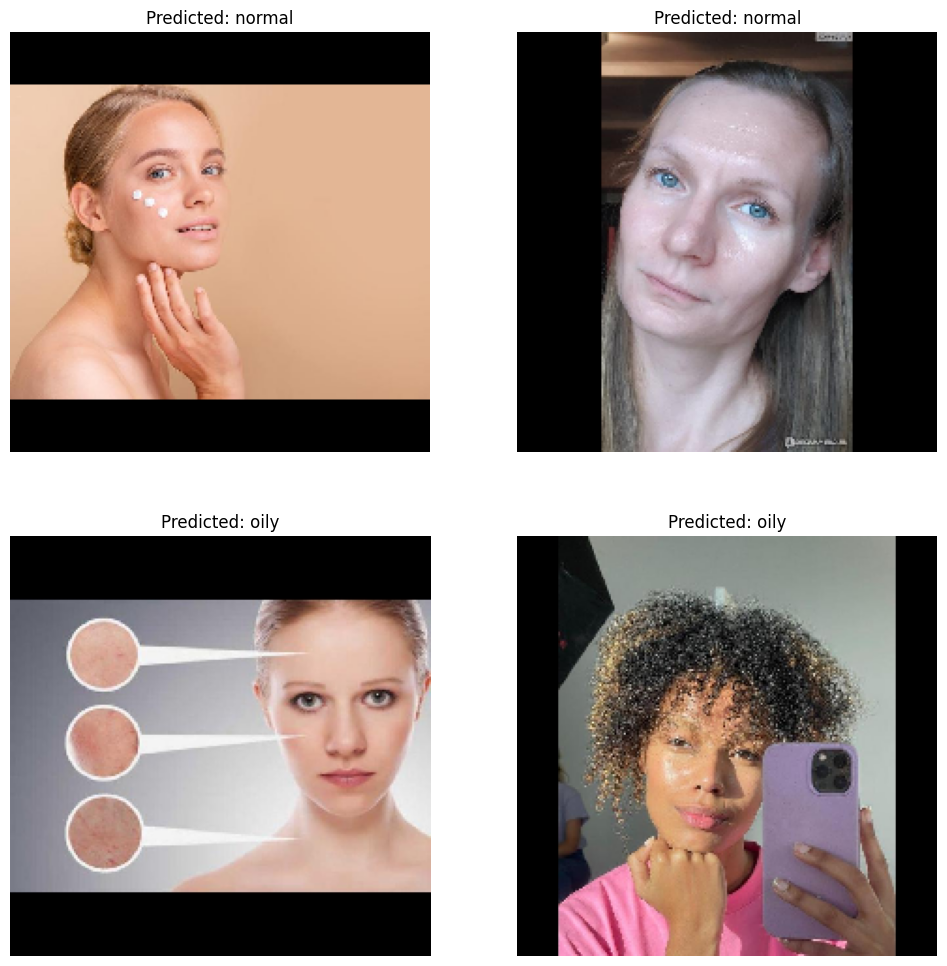

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the label of the validation images
pred = model.predict(validation)
pred_classes = np.argmax(pred, axis=1)

# Map the label
labels = (train.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred_labels = [labels[k] for k in pred_classes]

# Display the first 4 images with their predicted labels
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img, label = validation[i]
    plt.imshow(img[0])
    plt.title(f'Predicted: {pred_labels[i]}')
    plt.axis('off')

plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step


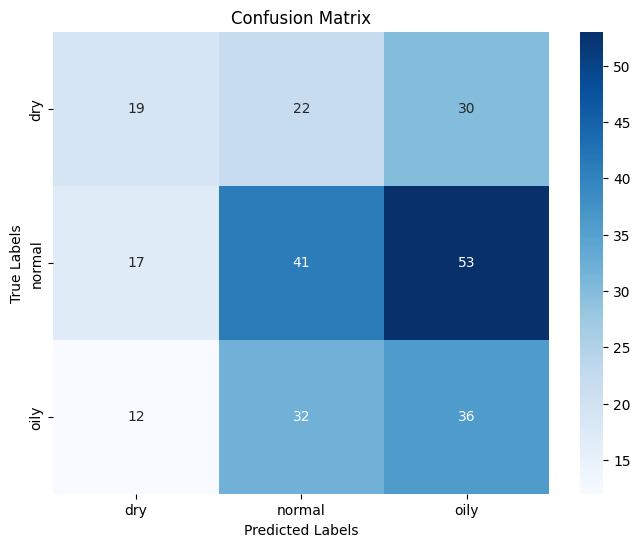

Classification Report:
               precision    recall  f1-score   support

         dry       0.40      0.27      0.32        71
      normal       0.43      0.37      0.40       111
        oily       0.30      0.45      0.36        80

    accuracy                           0.37       262
   macro avg       0.38      0.36      0.36       262
weighted avg       0.38      0.37      0.37       262



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predictions
y_test = validation.classes
pred = model.predict(validation, steps=validation.samples // validation.batch_size + 1)
pred_classes = np.argmax(pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(validation.class_indices.keys()), yticklabels=list(validation.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate the classification report
report = classification_report(y_test, pred_classes, target_names=list(validation.class_indices.keys()))
print("Classification Report:\n", report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step


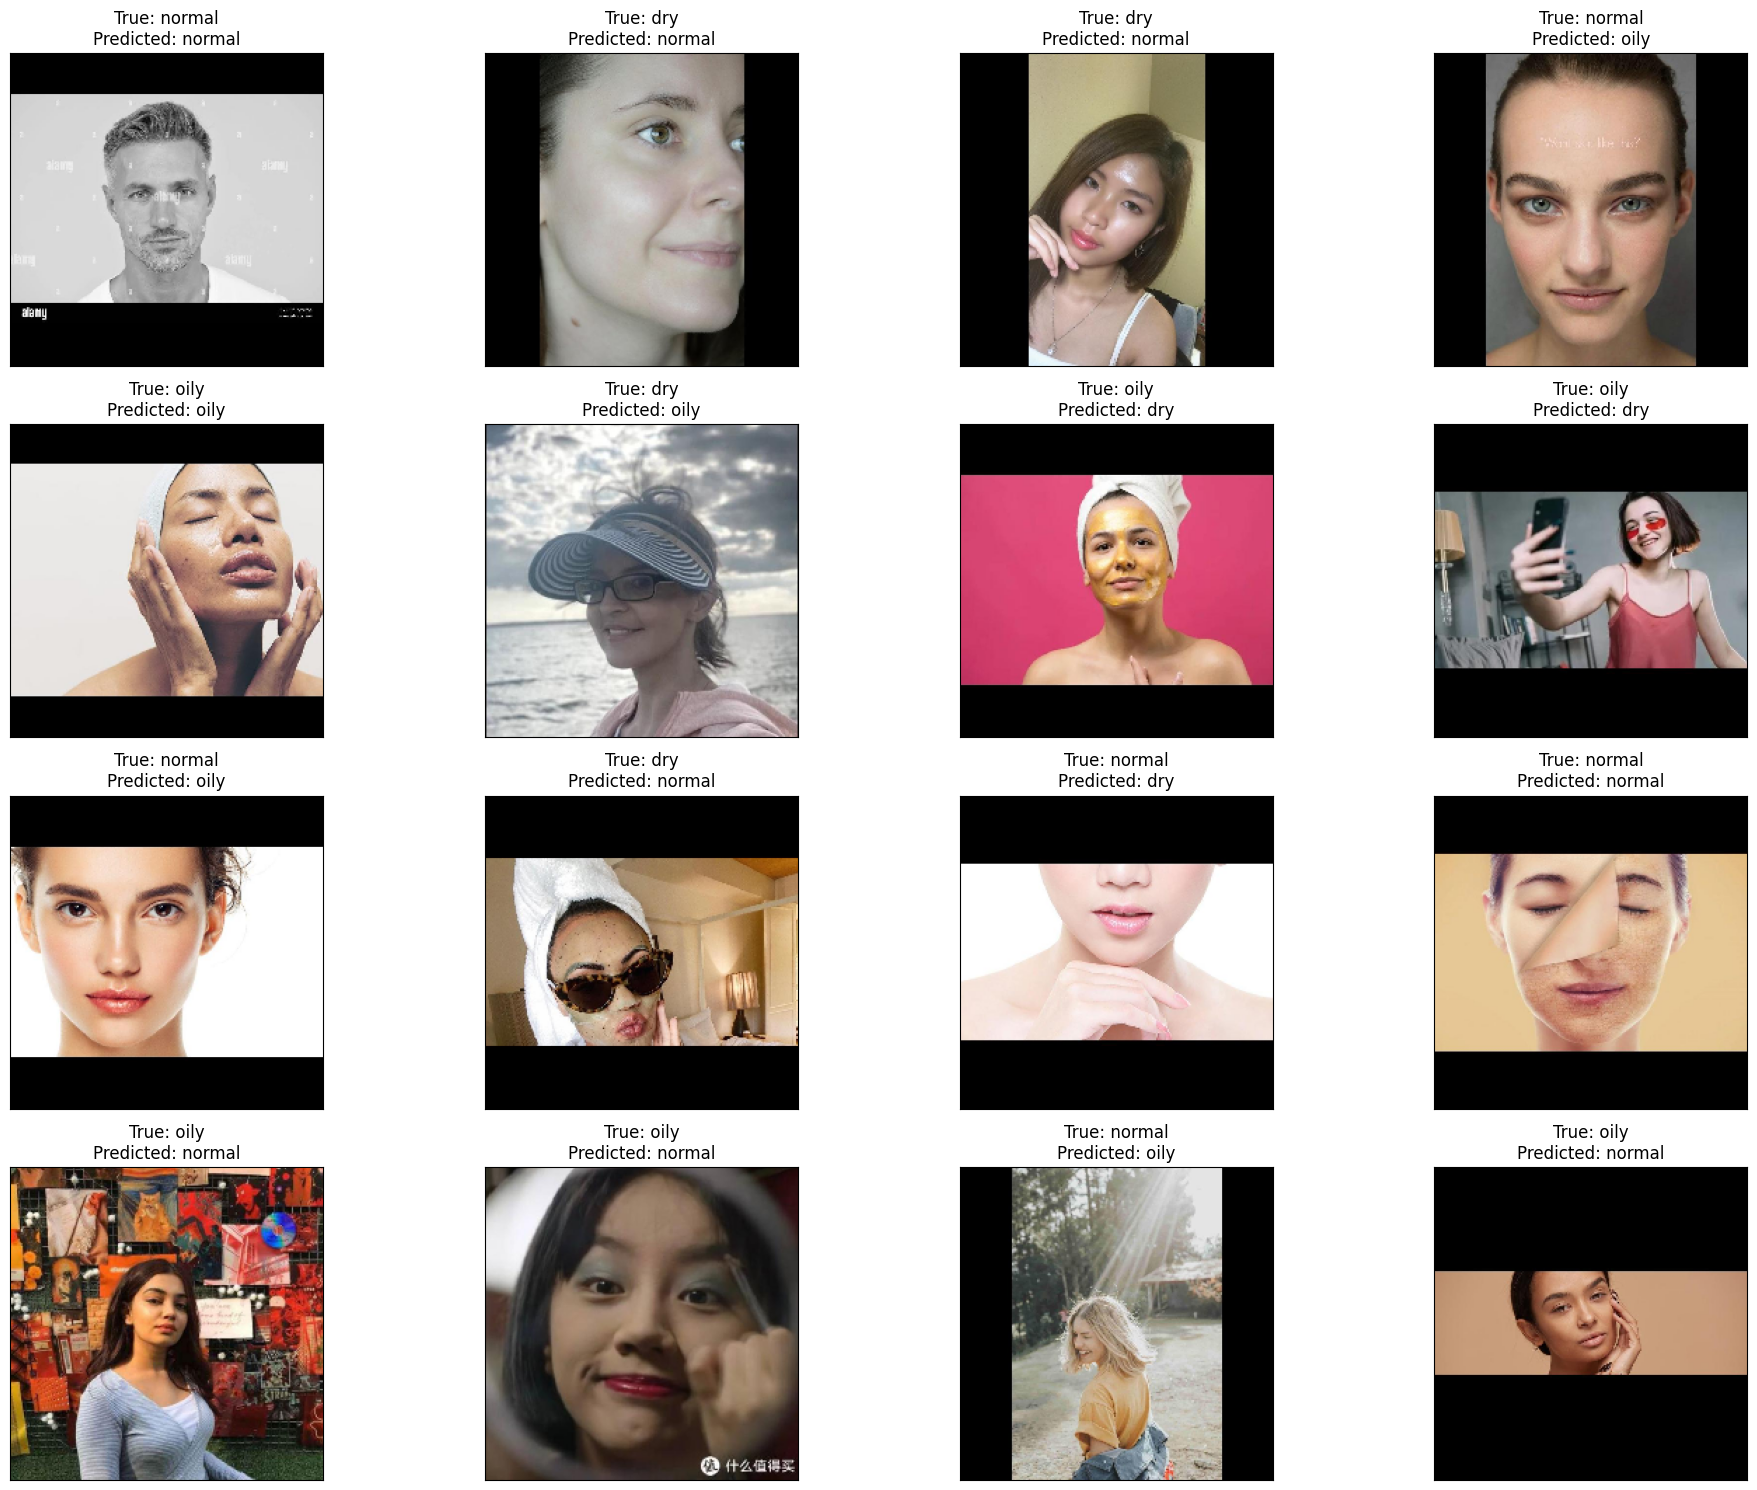

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
y_test = validation.classes
pred = model.predict(validation, steps=validation.samples // validation.batch_size + 1)
pred_classes = np.argmax(pred, axis=1)

# Get class labels
class_labels = list(validation.class_indices.keys())

# Determine the number of images to display
num_images = min(len(pred_classes), 16)  # Display up to 16 images

# Display the images along with their true and predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat[:num_images]):
    # Extract image and its true label
    img, label = next(validation)  # Get the next batch of images and labels
    true_label = class_labels[np.argmax(label[0])]

    # Get the predicted label
    predicted_label = class_labels[pred_classes[i]]

    # Display the image
    ax.imshow(img[0])

    # Set the title with true and predicted labels
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()

In [28]:
model.save('SKYNTYPE.h5', include_optimizer=False)

ValueError: Unable to synchronously create dataset (name already exists)